In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 9

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.shape

(299, 13)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [7]:
focus = ["creatinine_phosphokinase", "serum_creatinine", "serum_sodium", "platelets", "DEATH_EVENT"]

## Question 1

-> target death event: if the patient deceased (DEATH EVENT = 1) during the follow-up period (boolean)

In [8]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [9]:
df = data[focus]

In [10]:
df.head()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets,DEATH_EVENT
0,582,1.9,130,265000.00,1
1,7861,1.1,136,263358.03,1
2,146,1.3,129,162000.00,1
3,111,1.9,137,210000.00,1
4,160,2.7,116,327000.00,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   creatinine_phosphokinase  299 non-null    int64  
 1   serum_creatinine          299 non-null    float64
 2   serum_sodium              299 non-null    int64  
 3   platelets                 299 non-null    float64
 4   DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 11.8 KB


### 1. Extract two dataframes with the above 4 features: df_0 for surviving patients (DEATH EVENT = 0) and df_1 for deceased patients (DEATH EVENT = 1)

In [12]:
df_0 = df[df['DEATH_EVENT'] == 0]
df_1 = df[df['DEATH_EVENT'] == 1]

In [13]:
df_0.head()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets,DEATH_EVENT
14,80,1.0,138,427000.0,0
20,52,1.3,137,276000.0,0
23,63,0.8,135,368000.0,0
33,159,1.2,138,302000.0,0
38,2656,2.3,137,305000.0,0


In [14]:
df_1.head()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets,DEATH_EVENT
0,582,1.9,130,265000.00,1
1,7861,1.1,136,263358.03,1
2,146,1.3,129,162000.00,1
3,111,1.9,137,210000.00,1
4,160,2.7,116,327000.00,1


### 2.  Construct the visual representations of correponding correlation matrices M0 (from df_0) and M1 (from df_1) and save the plots into two separate files

In [15]:
cols = ["creatinine_phosphokinase", "serum_creatinine", "serum_sodium", "platelets"]

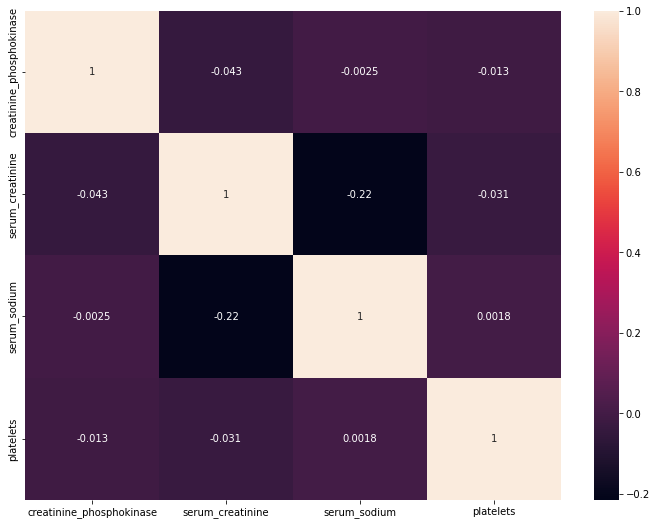

In [16]:
M_0 = df_0[cols].corr()
sns.heatmap(M_0, annot=True)
plt.savefig('M0.pdf')  
plt.show()

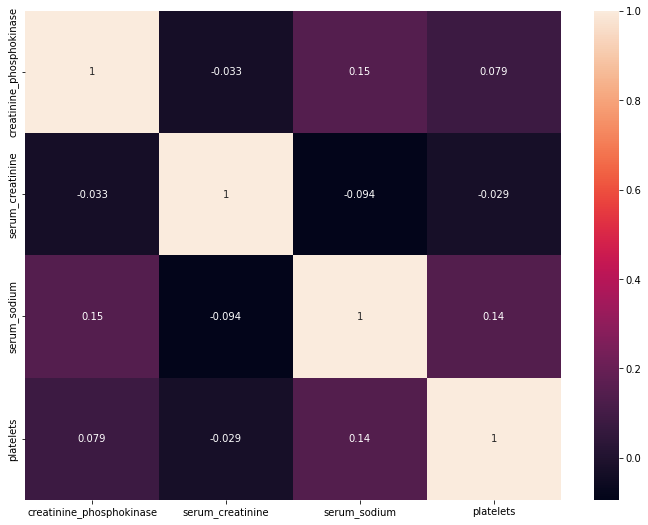

In [17]:
M_1 = df_1[cols].corr()
sns.heatmap(M_1, annot=True)
plt.savefig('M1.pdf')  
plt.show()

### 3.  Examine your correlation matrix plots visually and answer the following:

(a) Which features have the highest correlation for surviving patients? => serum_sodium and creatinine_phosphokinase, serum_sodium and platelets

(b) Which features have the lowest correlation for surviving patients? => serum_sodium and serum_creatinine

(c) Which features have the highest correlation for deceased patients? => serum_sodium and platelets

(d) Which features have the lowest correlation for deceased patients? => serum_sodium and serum_creatinine

(e) Are results the same for both cases? => The results for features having the lowest correlation are same for surviving and deceased patients. And similar for features having the highest correlation are same for surviving and deceased patients.

## Question 2

-> Compare a number of different models using linear systems (including linear regression). 

-> Choose one feature X as independent variable X, and another feature Y as dependent. Choice of X and Y will depend on your facilitator group as follows:
1. Group 1 -> X: creatinine phosphokinase (CPK), Y: platelets
2. Group 2 -> X: platelets, Y: serum sodium
3. Group 3 -> X: serum sodium, Y: serum creatinine
4. Group 4 -> X: platelets, Y: serum creatinine

-> Based on BUID -> Group 3 -> X: serum sodium, Y: serum creatinine

### 1. y = ax + b (simple linear regression) 

MSE: 0.331


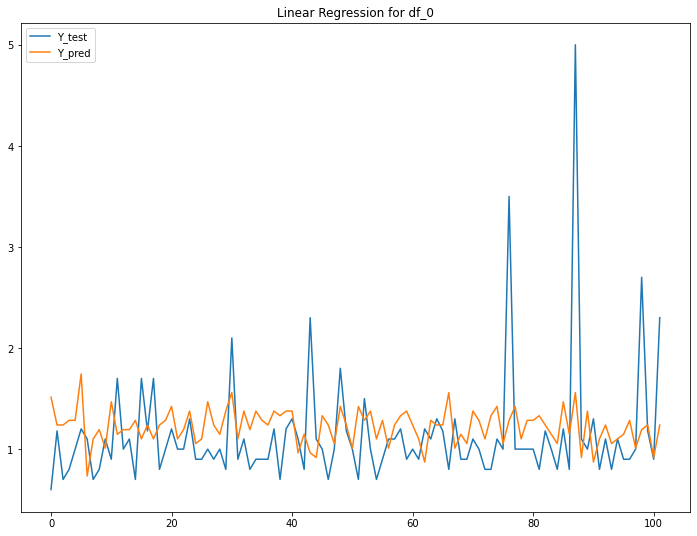

In [18]:
X = np.array(df_0['serum_sodium'])
Y = np.array(df_0['serum_creatinine'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train.reshape(-1, 1), Y_train)
Y_pred = pipeline.predict(X_test.reshape(-1, 1))
print('MSE: %.3f' % (mean_squared_error(Y_test, Y_pred)))

lr_0 = plt.plot(Y_test)
plt.plot(Y_pred)
plt.title("Linear Regression for df_0")
plt.legend(["Y_test", "Y_pred"], loc ="upper left")
plt.show()

MSE: 2.491


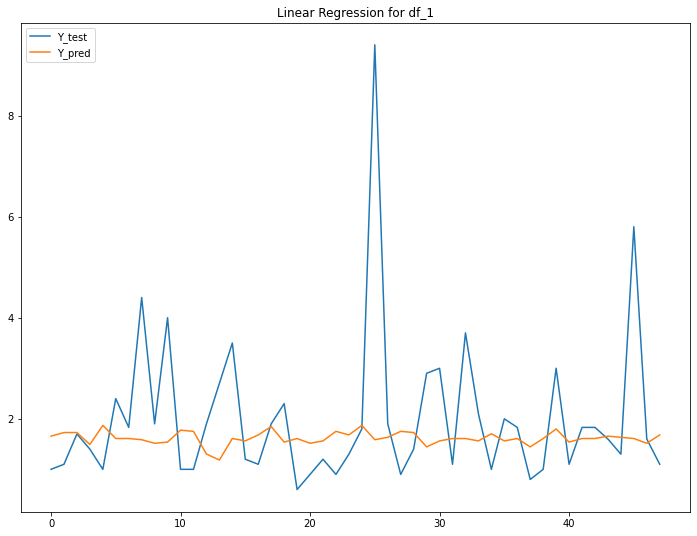

In [19]:
X = np.array(df_1['serum_sodium'])
Y = np.array(df_1['serum_creatinine'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train.reshape(-1, 1), Y_train)
Y_pred = pipeline.predict(X_test.reshape(-1, 1))
print('MSE: %.3f' % (mean_squared_error(Y_test, Y_pred)))

lr_1 = plt.plot(Y_test)
plt.plot(Y_pred)
plt.title("Linear Regression for df_1")
plt.legend(["Y_test", "Y_pred"], loc ="upper left")
plt.show()

### 2. y = ax2 + bx + c (quadratic)

          2
0.001229 x - 0.3668 x + 28.36
MSE: 0.403


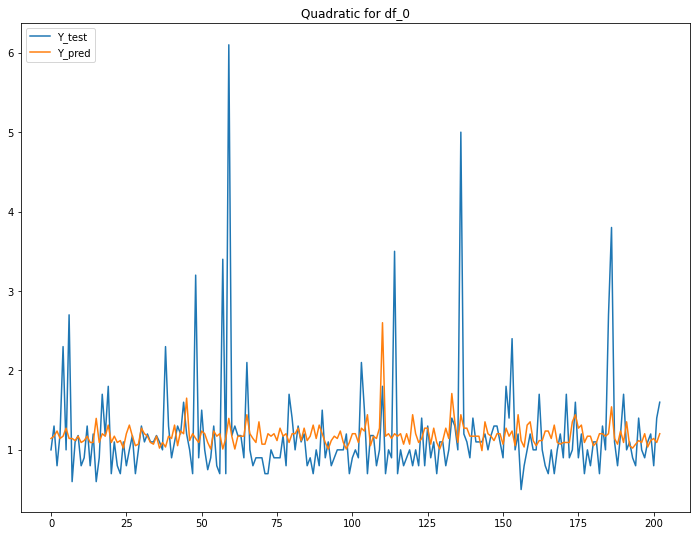

In [20]:
X = np.array(df_0['serum_sodium'])
Y = np.array(df_0['serum_creatinine'])

model = np.poly1d(np.polyfit(X, Y, 2))

print(model)
print('MSE: %.3f' % (mean_squared_error(Y, model(X))))

q_0 = plt.plot(Y)
plt.plot(model(X))
plt.title("Quadratic for df_0")
plt.legend(["Y_test", "Y_pred"], loc ="upper left")
plt.show()

          2
0.001392 x - 0.3999 x + 30.43
MSE: 2.111


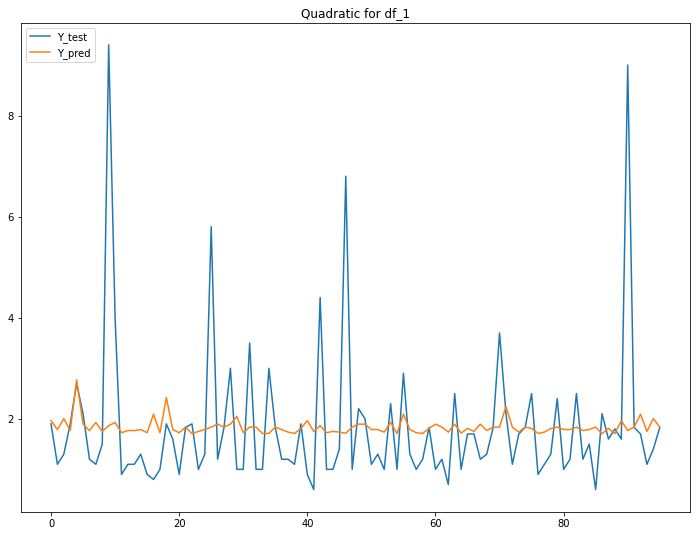

In [21]:
X = np.array(df_1['serum_sodium'])
Y = np.array(df_1['serum_creatinine'])

model = np.poly1d(np.polyfit(X, Y, 2))

print(model)
print('MSE: %.3f' % (mean_squared_error(Y, model(X))))

q_1 = plt.plot(Y)
plt.plot(model(X))
plt.title("Quadratic for df_1")
plt.legend(["Y_test", "Y_pred"], loc ="upper left")
plt.show()

###  3. y = ax3 + bx2 + cx + d (cubic spline)

           3          2
0.0003174 x - 0.1238 x + 16 x - 683.6
MSE: 0.386


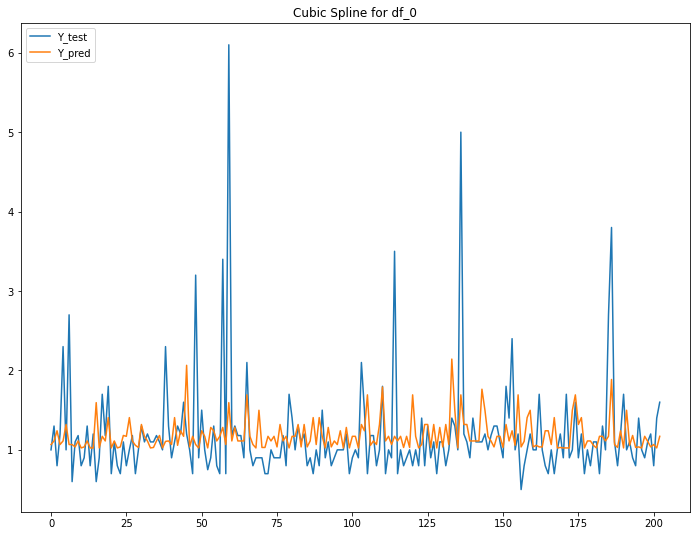

In [22]:
X = np.array(df_0['serum_sodium'])
Y = np.array(df_0['serum_creatinine'])

model = np.poly1d(np.polyfit(X, Y, 3))

print(model)
print('MSE: %.3f' % (mean_squared_error(Y, model(X))))

c_0 = plt.plot(Y)
plt.plot(model(X))
plt.title("Cubic Spline for df_0")
plt.legend(["Y_test", "Y_pred"], loc ="upper left")
plt.show()

           3          2
0.0005244 x - 0.2064 x + 26.98 x - 1169
MSE: 2.069


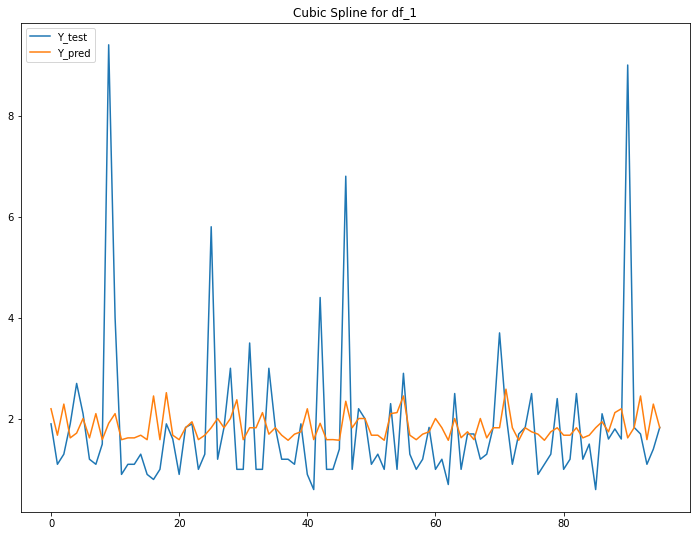

In [23]:
X = np.array(df_1['serum_sodium'])
Y = np.array(df_1['serum_creatinine'])

model = np.poly1d(np.polyfit(X, Y, 3))

print(model)
print('MSE: %.3f' % (mean_squared_error(Y, model(X))))

c_1 = plt.plot(Y)
plt.plot(model(X))
plt.title("Cubic Spline for df_1")
plt.legend(["Y_test", "Y_pred"], loc ="upper left")
plt.show()

### 4. y = a log x + b (GLM - generalized linear model)

 
-4.815 x + 24.88
MSE: 406167.891


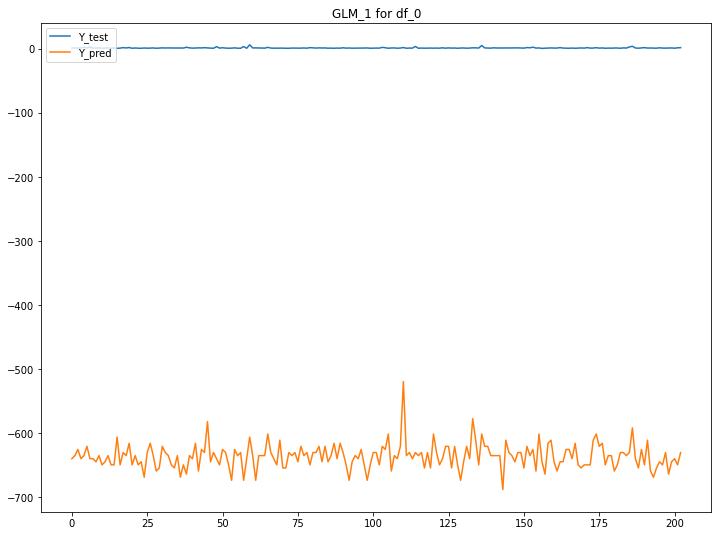

In [24]:
X = np.array(df_0['serum_sodium'])
Y = np.array(df_0['serum_creatinine'])

model = np.poly1d(np.polyfit(np.log(X), Y, 1))

print(model)
print('MSE: %.3f' % (mean_squared_error(Y, model(X))))

glm_0 = plt.plot(Y)
plt.plot(model(X))
plt.title("GLM_1 for df_0")
plt.legend(["Y_test", "Y_pred"], loc ="upper left")
plt.show()

 
-3.732 x + 20.15
MSE: 237402.438


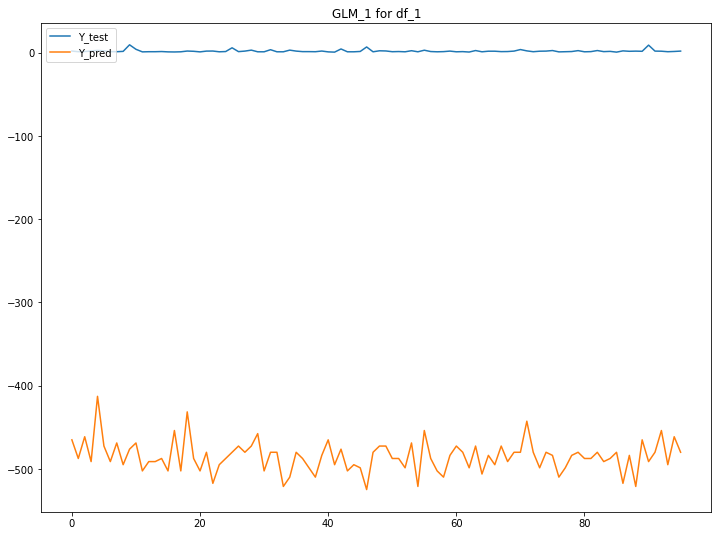

In [25]:
X = np.array(df_1['serum_sodium'])
Y = np.array(df_1['serum_creatinine'])

model = np.poly1d(np.polyfit(np.log(X), Y, 1))

print(model)
print('MSE: %.3f' % (mean_squared_error(Y, model(X))))

glm_1 = plt.plot(Y)
plt.plot(model(X))
plt.title("GLM_1 for df_1")
plt.legend(["Y_test", "Y_pred"], loc ="upper left")
plt.show()

### 5. log y = a log x + b (GLM - generalized linear model)

 
-2.576 x + 12.76
MSE: 117004.508


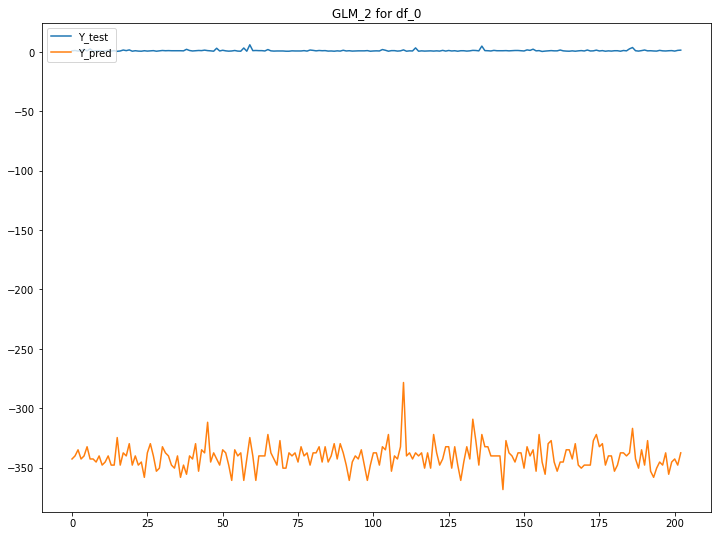

In [26]:
X = np.array(df_0['serum_sodium'])
Y = np.array(df_0['serum_creatinine'])

model = np.poly1d(np.polyfit(np.log(X), np.log(Y), 1))

print(model)
print('MSE: %.3f' % (mean_squared_error(Y, model(X))))

glm_0 = plt.plot(Y)
plt.plot(model(X))
plt.title("GLM_2 for df_0")
plt.legend(["Y_test", "Y_pred"], loc ="upper left")
plt.show()

 
-2.867 x + 14.51
MSE: 141187.050


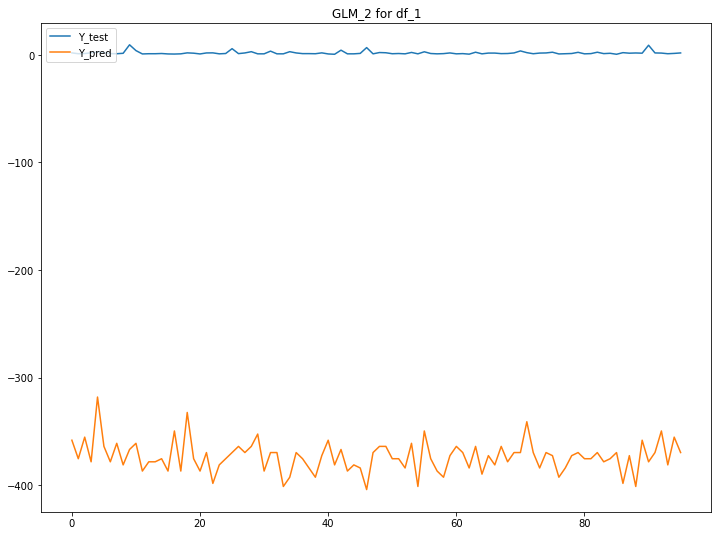

In [27]:
X = np.array(df_1['serum_sodium'])
Y = np.array(df_1['serum_creatinine'])

model = np.poly1d(np.polyfit(np.log(X), np.log(Y), 1))

print(model)
print('MSE: %.3f' % (mean_squared_error(Y, model(X))))

glm_1 = plt.plot(Y)
plt.plot(model(X))
plt.title("GLM_2 for df_1")
plt.legend(["Y_test", "Y_pred"], loc ="upper left")
plt.show()

## Question 3

In [28]:
dict = {'Model' : ['y = ax + b', 'y = ax2 + bx + c', 
                      'y = ax3 + bx2 + cx + d', 'y = a log x + b', 
                      'log y = a log x + b'],
        'SSE for death_event = 0' : [0.331, 0.403, 0.386, 406167.891, 117004.508],
        'SSE for death_event = 1' : [2.491, 2.111, 2.069, 237402.438, 141187.050]}
summary = pd.DataFrame(dict)
display(summary)

,Model,SSE for death_event = 0,SSE for death_event = 1
0,y = ax + b,0.331,2.491
1,y = ax2 + bx + c,0.403,2.111
2,y = ax3 + bx2 + cx + d,0.386,2.069
3,y = a log x + b,406167.891,237402.438
4,log y = a log x + b,117004.508,141187.050


1.1 Which model was the best (smallest SSE) for surviving patients? -> y = ax+b

1.2 Which model was the best (smallest SSE) for deceased patients? -> y = ax3 + bx2 + cx + d

2.1 Which model was the worst (largest SSE) for surviving patients? -> y = a log x + b

2.1 Which model was the worst (largest SSE) for deceased patients? -> y = a log x + b